# 19-Flammability 2

Download lecture freeform here: https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/311Flammability.pdf 

## Python Flammability Diagram

Below code submitted by [Isaac Matthews](https://www.linkedin.com/in/isaac-matthews-2a0244290/), 2024.

In [2]:
#pip install matplotlib, python-ternary#this is the newer one, it wont work if you install ternary, 
#and I don't think that package has something to uninstall with pip

/Users/clintguymon/opt/anaconda3/envs/jupiterbook/lib/python3.9/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


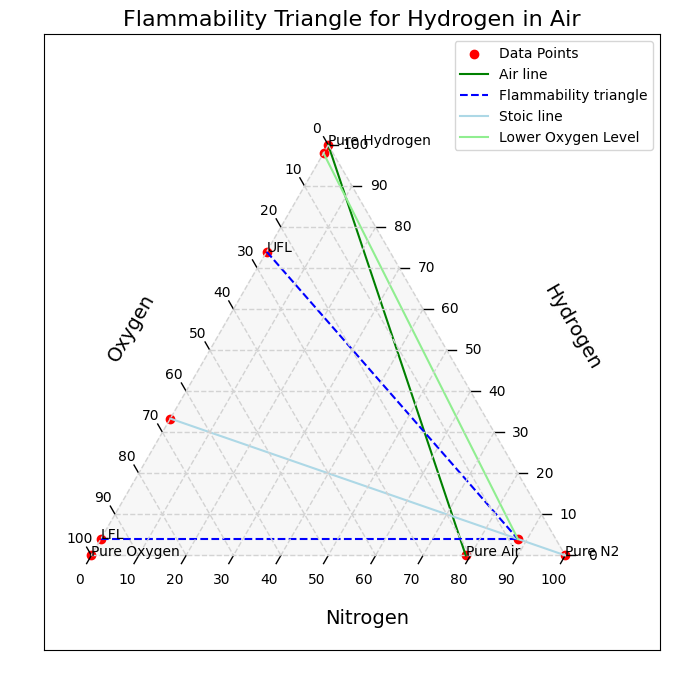

In [3]:
import matplotlib.pyplot as plt
import ternary
from scipy.optimize import fsolve

ufl = 74
lfl = 4
stoic = 2
lol = 2

def flammabilityTriangle(name,lfl, ufl, stoic,loc,figsize = (10, 8)):
    s = lambda x: 100-(x+x*stoic)
    sf = fsolve(s,10)[0]
    data = [
         #n bz o
        [0, 0, 100],  # Pure Oxygen 0
        [79, 0, 21],  # Pure Air 1
        [0, 100, 0],  # Pure Benzene  2
        [100,0,0],#pure n2  3
        [0, lfl,0], #LFL  4
        [0,ufl,0],#UFL  5
        [0,100-loc,loc],#loc
        [0,sf,sf*stoic],#stoic point  6
        [100-lfl*(1+stoic),lfl,stoic*lfl],#intersection  7]
        # Add more data points as needed
    ]
    # Create a larger figure
    whole = plt.figure(figsize=figsize)
    box = whole.subplots() 
    # Create a ternary plot
    fig, tax = ternary.figure(ax = box, scale=100)
    #fix what terniary messes up
    box.set_ylim(-20,110)
    box.set_xlim(-10,120)
    box.set_aspect(1)
    box.tick_params(axis='both', which='both', length=0,labelcolor = 'white') #if you can't beat them join them
    
    tax.ticks(axis='lbr', linewidth=1, multiple=10, offset=0.02, clockwise=False)
    # Plot data points
    tax.scatter(data, marker='o', color='red', label='Data Points')
    
    # Add a line between pure benzene and pure air
    tax.line(data[2], data[1], color='green', linestyle='-',label = "Air line")
    tax.line(data[4], data[8], color='blue', linestyle='--', label = "Flammability triangle")
    tax.line(data[3], data[7], color='lightblue', linestyle='-', label = "Stoic line")
    tax.line(data[5], data[8], color='blue', linestyle='--')
    tax.line(data[6], data[8], color='lightgreen', linestyle='-', label = "Lower Oxygen Level")
    # Customize the plot
    tax.set_title(f"Flammability Triangle for {name} in Air", fontsize=16)
    tax.left_axis_label("Oxygen", fontsize=14, offset=0.15)
    tax.right_axis_label(name, fontsize=14, offset=0.15)
    tax.bottom_axis_label("Nitrogen", fontsize=14, offset=-.1)
    tax.gridlines(color="lightgrey", multiple=10, linewidth=1, linestyle='--')
    
    # Define labels for data points
    labels = ["Pure Oxygen", "Pure Air", f"Pure {name}","Pure N2","LFL","UFL","","","",""]
    
    # Add labels for data points
    for i, point in enumerate(data):
        tax.annotate(labels[i], position=point, fontsize=10)
    
    # Number the axes on the sides
    
    
    # Add legend
    tax.legend()
    
    # Show the plot
    plt.ticks = False
    plt.show()

flammabilityTriangle("Hydrogen", lfl,ufl,stoic,lol)